# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [5]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [6]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [7]:
df = df_test.append(df_train).reset_index(drop=True)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [9]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


In [10]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Среднее', 'Высшее', 'Неоконченное высшее', 'Неполное среднее', 'Ученая степень', 'Среднее специальное'}


MARITAL_STATUS
{'Гражданский брак', 'Разведен(а)', 'Вдовец/Вдова', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{'Государственная служба', nan, 'Управляющая компания', 'Маркетинг', 'Информационные услуги', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Салоны красоты и здоровья', 'Логистика', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Другие сферы', 'Подбор персонала', 'Туризм', 'Торговля', 'Сельское хозяйство', 'Здравоохранение', 'Образование', 'Юридические услуги/нотариальные услуги', 'Нефтегазовая промышленность', 'Сборочные производства', 'Информационные технологии', 'Строительство', 'Энергетика', 'Развлечения/Искусство', 'Транспорт', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы', 'Наука', 'Банк/Финансы', 'Недвижимость', 'Химия/Парфюмерия/Фармацевтика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [11]:
# df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [12]:
for x in df.columns:
    if str(df[x].dtype) == 'object':
        if df[str(x)].str.isnumeric().median() == 1:
            df[str(x)] = df[str(x)].map(lambda x: x.replace(',', '.')).astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [14]:
df.isnull().any()

AGREEMENT_RK                  False
TARGET                        False
AGE                           False
SOCSTATUS_WORK_FL             False
SOCSTATUS_PENS_FL             False
GENDER                        False
CHILD_TOTAL                   False
DEPENDANTS                    False
EDUCATION                     False
MARITAL_STATUS                False
GEN_INDUSTRY                   True
GEN_TITLE                      True
ORG_TP_STATE                   True
ORG_TP_FCAPITAL                True
JOB_DIR                        True
FAMILY_INCOME                 False
PERSONAL_INCOME               False
REG_ADDRESS_PROVINCE          False
FACT_ADDRESS_PROVINCE         False
POSTAL_ADDRESS_PROVINCE       False
TP_PROVINCE                    True
REGION_NM                      True
REG_FACT_FL                   False
FACT_POST_FL                  False
REG_POST_FL                   False
REG_FACT_POST_FL              False
REG_FACT_POST_TP_FL           False
FL_PRESENCE_FL              

In [15]:
# В некоторых признаках присутствуют значения 'NaN', есть смысл заполнить эти пропуски
# экстремальными значениями, к примеру с помощью -1.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
''' Во-первых, имеются категориальные признаки, которые нужно конвертировать из текстового
    вида в числовой.
    Во-вторых, есть категориальные признаки в числовом виде и их разбивка по категориям 
    зависит от выставленной границы (treshold, см. ниже).
'''

treshold = 10 # Количество уникальных значений, по которому определяем "категориальность" 
              # признака
for x in df.columns:
    if (len(np.unique(list(df[str(x)])))) < treshold:
        print(x)

TARGET
SOCSTATUS_WORK_FL
SOCSTATUS_PENS_FL
GENDER
DEPENDANTS
EDUCATION
MARITAL_STATUS
ORG_TP_STATE
ORG_TP_FCAPITAL
FAMILY_INCOME
REG_FACT_FL
FACT_POST_FL
REG_POST_FL
REG_FACT_POST_FL
REG_FACT_POST_TP_FL
FL_PRESENCE_FL
OWN_AUTO
AUTO_RUS_FL
HS_PRESENCE_FL
COT_PRESENCE_FL
GAR_PRESENCE_FL
LAND_PRESENCE_FL
DL_DOCUMENT_FL
GPF_DOCUMENT_FL
FACT_PHONE_FL
REG_PHONE_FL
GEN_PHONE_FL
LOAN_NUM_TOTAL
LOAN_MAX_DLQ
sample


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def preproc_data(df_input):
    df_output = df_input.copy()
    
    # Удаляем идентификатор AGREEMENT_RK
    df_output.drop('AGREEMENT_RK', axis=1, inplace=True)
    
    # Меняем ',' на '.' и конвертируем в числа стринги, с которыми это возможно сделать
    for x in df_output.columns:
        if str(df_output[x].dtype) == 'object':
            if df_output[str(x)].str.isnumeric().median() == 1:
                df_output[str(x)] = df_output[str(x)].map(lambda x: x.replace(',', '.')).astype('float')
    
    # С помощью One-Hot-Encoding раскладываем категориальные признаки с текстом 
    # (для удобства добавляем префиксы)
    for x in df_output.columns:
        if df_output[str(x)].dtypes == 'object' and str(x) != 'sample':
            dn = pd.get_dummies(df_output[str(x)], prefix=str(x))
            df_output = df_output.join(dn).drop(str(x), axis=1)
            
    # Заполняем оставшиеся 'NaN' значениями -1
    df_output = df_output.fillna(-1)
    
    return df_output

In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"')
df_train_preproc = df_train_preproc.drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"')
df_test_preproc = df_test_preproc.drop(['sample'], axis=1)
# Вдобавок дропнул технический столбец 'sample'

In [19]:
df_train_preproc.shape, df_test_preproc.shape

((15223, 443), (14910, 443))

In [20]:
df_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,1,0,0,0,0,0,0,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [21]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test_holdout = df_test_preproc.drop(['TARGET'], axis=1)
y = df_train_preproc['TARGET']
y_test_holdout = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [22]:
from sklearn.model_selection import train_test_split

X = df_preproc.drop(['TARGET', 'sample'], axis=1)
y = df_preproc['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, \
X_test_holdout.shape, y_test_holdout.shape

((21093, 442), (9040, 442), (21093,), (9040,), (14910, 442), (14910,))

In [24]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [26]:
tree = DecisionTreeClassifier()
tree_model = tree.fit(X_train, y_train)
tree_predicted = tree_model.predict(X_test)

tree_ac = accuracy_score(y_test, tree_predicted)
tree_ps = precision_score(y_test, tree_predicted)
tree_re = recall_score(y_test, tree_predicted)

print('Decision Tree results: ', '-' * 35,
      'Accuracy Score: ' + str(tree_ac), 
      'Precision Score: ' + str(tree_ps),
      'Recall Score: ' + str(tree_re),
      sep='\n')

Decision Tree results: 
-----------------------------------
Accuracy Score: 0.806194690265
Precision Score: 0.176585365854
Recall Score: 0.166207529844


In [27]:
rforest = RandomForestClassifier()
rforest_model = rforest.fit(X_train, y_train)
rforest_predicted = rforest_model.predict(X_test)

rforest_ac = accuracy_score(y_test, rforest_predicted)
rforest_ps = precision_score(y_test, rforest_predicted)
rforest_re = recall_score(y_test, rforest_predicted)

print('Random Forest results: ', '-' * 35,
      'Accuracy Score: ' + str(rforest_ac), 
      'Precision Score: ' + str(rforest_ps),
      'Recall Score: ' + str(rforest_re),
      sep='\n')

Random Forest results: 
-----------------------------------
Accuracy Score: 0.877212389381
Precision Score: 0.2
Recall Score: 0.00642791551882


In [28]:
logit = LogisticRegression()
logit_model = logit.fit(X_train, y_train)

logit_predicted = logit_model.predict(X_test)

logit_ac = accuracy_score(y_test, logit_predicted)
logit_ps = precision_score(y_test, logit_predicted)
logit_re = recall_score(y_test, logit_predicted)

print('Logistic Regression results: ', '-' * 35,
      'Accuracy Score: ' + str(logit_ac), 
      'Precision Score: ' + str(logit_ps),
      'Recall Score: ' + str(logit_re),
      sep='\n')

Logistic Regression results: 
-----------------------------------
Accuracy Score: 0.87842920354
Precision Score: 0.142857142857
Recall Score: 0.00183654729109


In [29]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает


In [30]:
from sklearn.metrics import precision_recall_curve

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


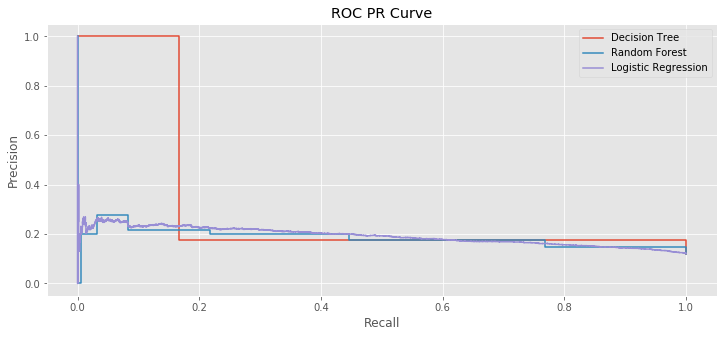

In [31]:
tree_precision, tree_recall, _ = \
precision_recall_curve(y_test, tree_model.predict_proba(X_test)[:,1])

rforest_precision, rforest_recall, _ = \
precision_recall_curve(y_test, rforest_model.predict_proba(X_test)[:,1])
                                                                   
logit_precision, logit_recall, _ = \
precision_recall_curve(y_test, logit_model.predict_proba(X_test)[:,1])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.step(tree_recall, tree_precision, label='Decision Tree')
plt.step(rforest_recall, rforest_precision, label='Random Forest')
plt.step(logit_recall, logit_precision, label='Logistic Regression')
plt.legend()
plt.title('ROC PR Curve')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


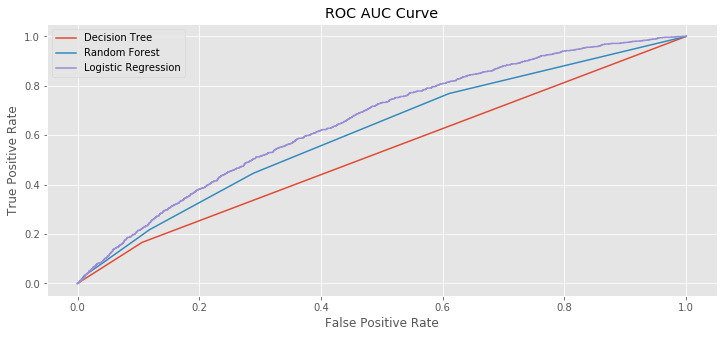

In [32]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

from sklearn.metrics import roc_curve, roc_auc_score

tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
plt.plot(tree_fpr, tree_tpr, label='Decision Tree')

rforest_fpr, rforest_tpr, _ = roc_curve(y_test, rforest_model.predict_proba(X_test)[:,1])
plt.plot(rforest_fpr, rforest_tpr, label='Random Forest')

logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_model.predict_proba(X_test)[:,1])
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC AUC Curve')
plt.show();

In [33]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

tree_cv = cross_val_score(tree_model, X_train, y_train, cv=10)
rforest_cv = cross_val_score(rforest_model, X_train, y_train, cv=10)
logit_cv = cross_val_score(logit_model, X_train, y_train, cv=10)

In [34]:
print('CV results for Decision Tree:', '-' * 35,
      tree_cv, sep='\n', end='\n\n')
print('CV results for Random Forest:', '-' * 35,
      rforest_cv, sep='\n', end='\n\n')
print('CV results for Logistic Regression:', '-' * 35,
      logit_cv, sep='\n', end='\n\n')

CV results for Decision Tree:
-----------------------------------
[ 0.80663507  0.80521327  0.81611374  0.80891418  0.78899953  0.78283547
  0.8018018   0.79184448  0.81365576  0.79943101]

CV results for Random Forest:
-----------------------------------
[ 0.88151659  0.88056872  0.87962085  0.88051209  0.88193457  0.88240872
  0.88003793  0.88051209  0.87908962  0.88098625]

CV results for Logistic Regression:
-----------------------------------
[ 0.88151659  0.88246445  0.88246445  0.88193457  0.88288288  0.88240872
  0.88193457  0.88288288  0.88288288  0.88288288]



In [35]:
print('ROC AUC results for Decision Tree:', '-' * 35,
      roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1]), 
      sep='\n', end='\n\n')
print('ROC AUC results for Random Forest:', '-' * 35,
      roc_auc_score(y_test, rforest_model.predict_proba(X_test)[:, 1]), 
      sep='\n', end='\n\n')
print('ROC AUC results for Logistic Regression:', '-' * 35,
      roc_auc_score(y_test, logit_model.predict_proba(X_test)[:, 1]), 
      sep='\n', end='\n\n')

ROC AUC results for Decision Tree:
-----------------------------------
0.530028680027

ROC AUC results for Random Forest:
-----------------------------------
0.609817316555

ROC AUC results for Logistic Regression:
-----------------------------------
0.65738587785



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [36]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
print('Probs for X_test_holdout: ', logit_model.predict_proba(X_test_holdout), end='\n\n')

Probs for X_test_holdout:  [[ 0.87785881  0.12214119]
 [ 0.93077831  0.06922169]
 [ 0.81459679  0.18540321]
 ..., 
 [ 0.85161315  0.14838685]
 [ 0.91889214  0.08110786]
 [ 0.8597007   0.1402993 ]]



ROC AUC results for Logistic Regression (Holdout Test): 
-----------------------------------
0.660515197568



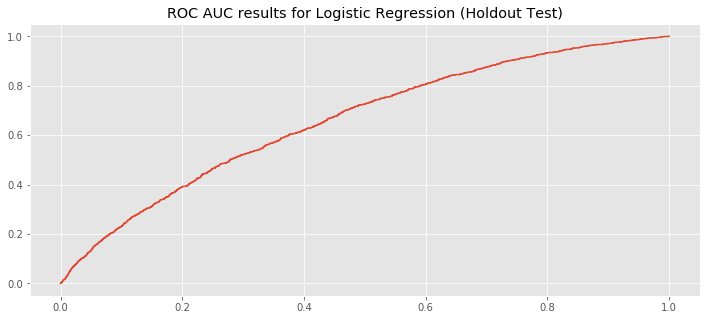

In [37]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

print('ROC AUC results for Logistic Regression (Holdout Test): ', '-' * 35,
      roc_auc_score(y_test_holdout, logit_model.predict_proba(X_test_holdout)[:, 1]), 
      sep='\n', end='\n\n')

x, y, _ = roc_curve(y_test_holdout, logit_model.predict_proba(X_test_holdout)[:,1])
plt.plot(x, y)
plt.title('ROC AUC results for Logistic Regression (Holdout Test)')
plt.show();

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [38]:
c_range = np.linspace(0.05, 5, 60)
cy = []

for c in c_range:
    logit = LogisticRegression(C=c, penalty='l1', max_iter=300)
    logit_model = logit.fit(X_train, y_train)
    cy.append(roc_auc_score(y_test, logit_model.predict_proba(X_test)[:, 1]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Text(0,0.5,'ROC AUC Score')

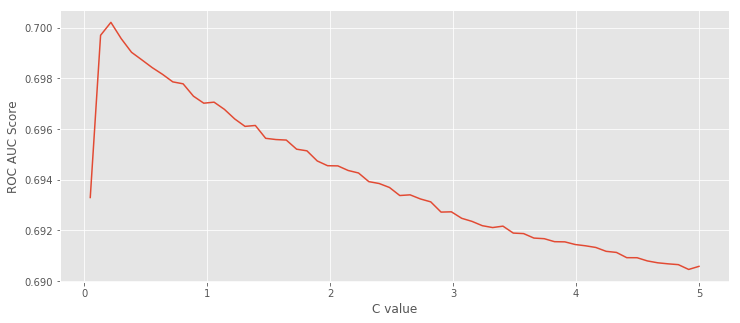

In [39]:
plt.plot(c_range, cy);
plt.xlabel('C value')
plt.ylabel('ROC AUC Score')

In [40]:
c_range = np.linspace(0.05, 0.5, 30)
cy = []

for c in c_range:
    logit = LogisticRegression(C=c, penalty='l1', max_iter=300, n_jobs=-1)
    logit_model = logit.fit(X_train, y_train)
    cy.append(roc_auc_score(y_test, logit_model.predict_proba(X_test)[:, 1]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Text(0,0.5,'ROC AUC Score')

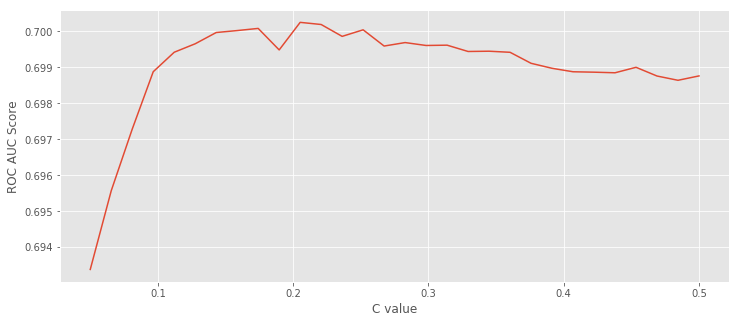

In [41]:
plt.plot(c_range, cy);
plt.xlabel('C value')
plt.ylabel('ROC AUC Score')

In [42]:
for c in [50,100,150,200,250,300,350,400]:
    logit = LogisticRegression(C=0.18, penalty='l1', max_iter=c)
    logit_model = logit.fit(X_train, y_train)
    cy.append(roc_auc_score(y_test, logit_model.predict_proba(X_test)[:, 1]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [43]:
# Теперь мы знаем оптимальный C, применяем к тестовой выборке

logit = LogisticRegression(C=0.18, penalty='l1', max_iter=300, random_state=173)
logit_model = logit.fit(X_train, y_train)
print('Tuned Logit results for X_test: ',
     roc_auc_score(y_test_holdout, logit_model.predict_proba(X_test_holdout)[:, 1]),
     sep='\n')


Tuned Logit results for X_test: 
0.714575032566
